<a href="https://colab.research.google.com/github/Ajay07pandey/HealthApp_Analysis/blob/main/HealthApp_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [71]:
df = pd.read_csv('/content/drive/MyDrive/Self Projects/Health Log/HealthApp_2k.log_structured.csv')

In [72]:
temp_df = pd.read_csv('/content/drive/MyDrive/Self Projects/Health Log/HealthApp_2k.log_templates.csv')

In [73]:
# first view of data set
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [74]:
temp_df

,EventId,EventTemplate
0,E1,Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1,E2,"bulkSaveDetailHiHealthData() size = <*>,totalT..."
2,E3,calculateAltitudeWithCache totalAltitude=<*>
3,E4,calculateCaloriesWithCache totalCalories=<*>
4,E5,"checkCurrentDay a new day comes , reset basicS..."
...,...,...
70,E71,tryToReloadTodayBasicSteps<*>|<*>|<*>|<*>
71,E72,"upLoadOneMinuteDataToEngine time=<*>,<*>,<*>,<..."
72,E73,uploadStaticsToDB failed message=true
73,E74,uploadStaticsToDB() onResult type = <*> obj=true


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


Great! No null values in the data set

In [76]:
df['Component'].value_counts()

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64

In [77]:
df['EventId'].value_counts()

E39    273
E42    260
E22    242
E58    241
E3     241
      ... 
E51      1
E31      1
E74      1
E73      1
E5       1
Name: EventId, Length: 75, dtype: int64

## **Data Wrangling**

### Type casting

In [78]:
# Convert the required data types
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [79]:
df['Pid'].value_counts()

30002312    2000
Name: Pid, dtype: int64

**Only 1 value in Pid so we can drop this**

In [80]:
df.drop(['Pid'], axis=1, inplace = True)

### Data Duration

In [83]:
df = df.sort_values(by='Time')

min_time = df['Time'].min()
max_time = df['Time'].max()
duration = max_time - min_time

print(f"Start Time: {min_time}")
print(f"End Time: {max_time}")
print(f"Duration: {duration}")

Start Time: 2017-12-23 22:15:29.606000
End Time: 2017-12-24 01:02:35.789000
Duration: 0 days 02:47:06.183000


We have data from December 23, 2017 to December 24, 2017, from 10:15 PM to 1:02 AM, for a duration of **2 hours and 47 minute**

In [84]:
df['Time'].dt.date.value_counts()

2017-12-23    1776
2017-12-24     224
Name: Time, dtype: int64

## **Exploratery Data Analysis**

### Time Distribution

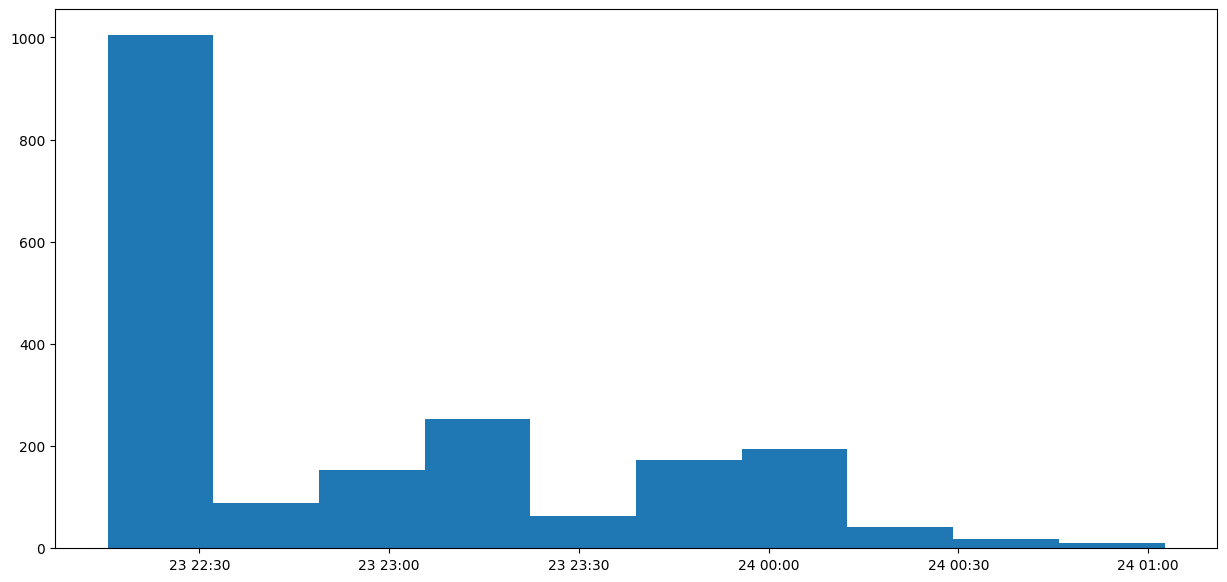

In [ ]:
fig,ax = plt.subplots(figsize = (15,7))
ax.hist(df['Time'])
fig.show()

### Event log distribution

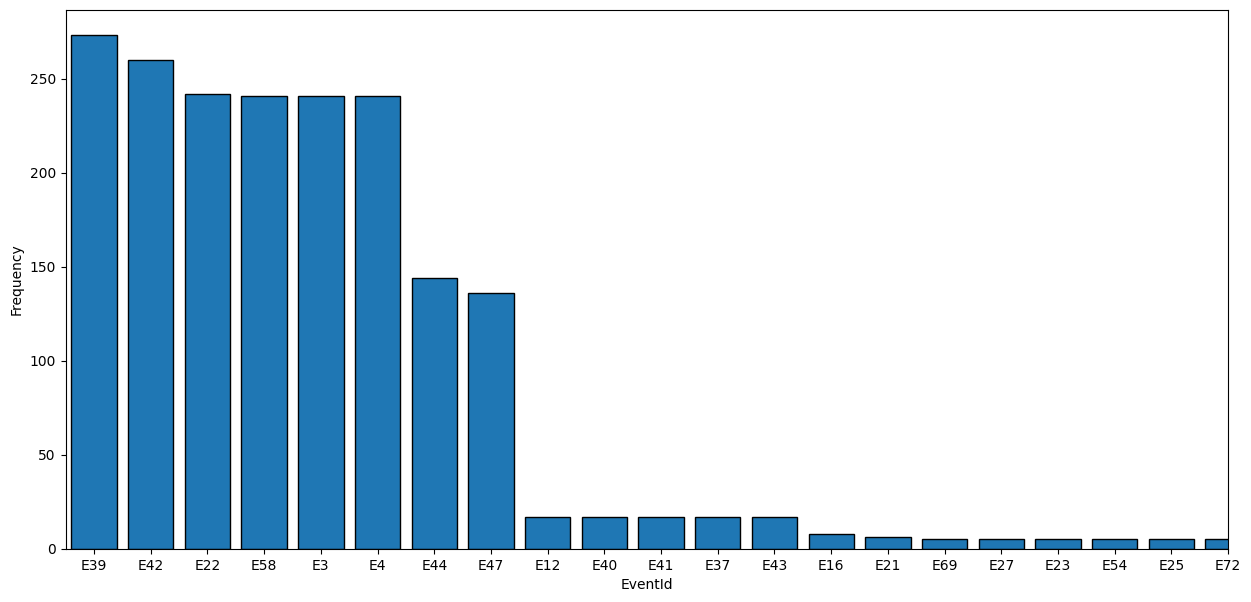

In [ ]:
event = df['EventId'].value_counts()
fig,ax = plt.subplots(figsize=(15, 7))

ax.bar(event.index, event, edgecolor='black')
ax.set_xlim(-0.5,20)

# Customize the plot

ax.set_ylabel('Frequency')
ax.set_xlabel('EventId')

# Show the plot
fig.show()


Most frequent Events are E39 E42 E22 E58 E3 E4 E44 E47

In [ ]:
frequent_events = ['E39', 'E42', 'E22', 'E58' ,'E3' ,'E4', 'E44', 'E47']

In [ ]:
event_template_dict = dict(zip(df['EventId'], df['EventTemplate']))

In [ ]:
event_templates = {event_id: event_template_dict.get(event_id) for event_id in frequent_events}
for event_id, event_template in event_templates.items():
    print(f"EventId: {event_id}\nEventTemplate: {event_template}\n")

EventId: E39
EventTemplate: onExtend:<*> <*> <*> <*>

EventId: E42
EventTemplate: onStandStepChanged <*>

EventId: E22
EventTemplate: getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>

EventId: E58
EventTemplate: setTodayTotalDetailSteps=<*>

EventId: E3
EventTemplate: calculateAltitudeWithCache totalAltitude=<*>

EventId: E4
EventTemplate: calculateCaloriesWithCache totalCalories=<*>

EventId: E44
EventTemplate: processHandleBroadcastAction action:android.intent.action.TIME_TICK

EventId: E47
EventTemplate: REPORT : <*> <*> <*> <*>



### Event **onExtend** variation with time

In [91]:
onExtend = df[df['EventId'] == 'E39'][['Time','Content']]
onExtend['onExtend'] = onExtend['Content'].str.extract(r':(\d+)').astype(float)
onExtend

,Time,Content,onExtend
1,2017-12-23 22:15:29.615,onExtend:1514038530000 14 0 4,1.514039e+12
11,2017-12-23 22:15:29.737,onExtend:1514038530000 0 0 4,1.514039e+12
14,2017-12-23 22:15:29.800,onExtend:1514038530000 1 0 4,1.514039e+12
21,2017-12-23 22:15:30.335,onExtend:1514038531000 1 0 4,1.514039e+12
28,2017-12-23 22:15:30.858,onExtend:1514038531000 2 0 4,1.514039e+12
...,...,...,...
1924,2017-12-24 00:11:57.149,onExtend:1514045517000 0 0 0,1.514046e+12
1934,2017-12-24 00:15:52.990,onExtend:1514045753000 0 0 0,1.514046e+12
1950,2017-12-24 00:25:16.146,onExtend:1514046316000 0 0 5,1.514046e+12
1956,2017-12-24 00:25:17.149,onExtend:1514046317000 0 0 0,1.514046e+12


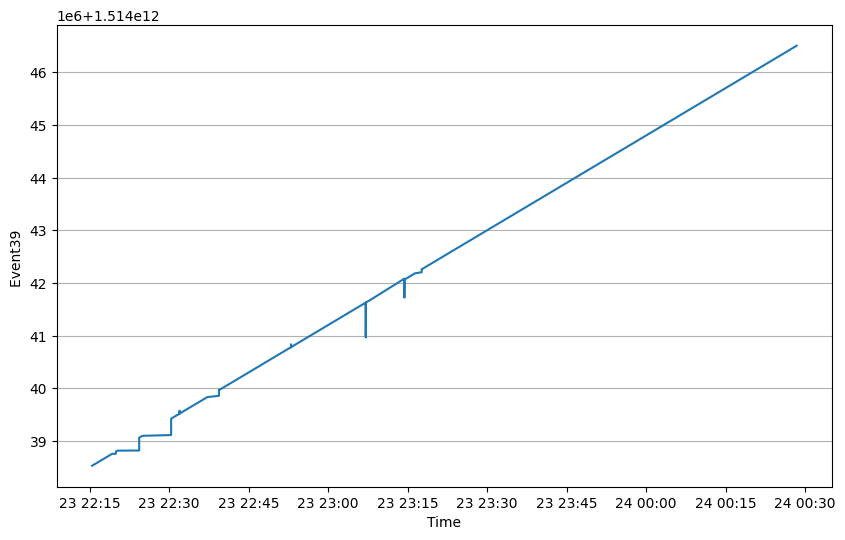

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(onExtend['Time'], onExtend['onExtend'])
plt.xlabel('Time')
plt.ylabel('Event39 ')
plt.grid(axis='y')
plt.show()

### **Calories Analysis**

In [104]:
calorie = df[df['EventId'] == 'E4'][['Time','Content']]
calorie['TotalCalories'] = calorie['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
calorie

,Time,Content,TotalCalories
8,2017-12-23 22:15:29.645,calculateCaloriesWithCache totalCalories=126775,126775.0
17,2017-12-23 22:15:29.959,calculateCaloriesWithCache totalCalories=126797,126797.0
24,2017-12-23 22:15:30.639,calculateCaloriesWithCache totalCalories=126818,126818.0
31,2017-12-23 22:15:31.157,calculateCaloriesWithCache totalCalories=126861,126861.0
38,2017-12-23 22:15:32.156,calculateCaloriesWithCache totalCalories=126882,126882.0
...,...,...,...
1927,2017-12-24 00:11:57.449,calculateCaloriesWithCache totalCalories=0,0.0
1937,2017-12-24 00:15:53.292,calculateCaloriesWithCache totalCalories=0,0.0
1953,2017-12-24 00:25:16.445,calculateCaloriesWithCache totalCalories=0,0.0
1959,2017-12-24 00:25:17.445,calculateCaloriesWithCache totalCalories=0,0.0


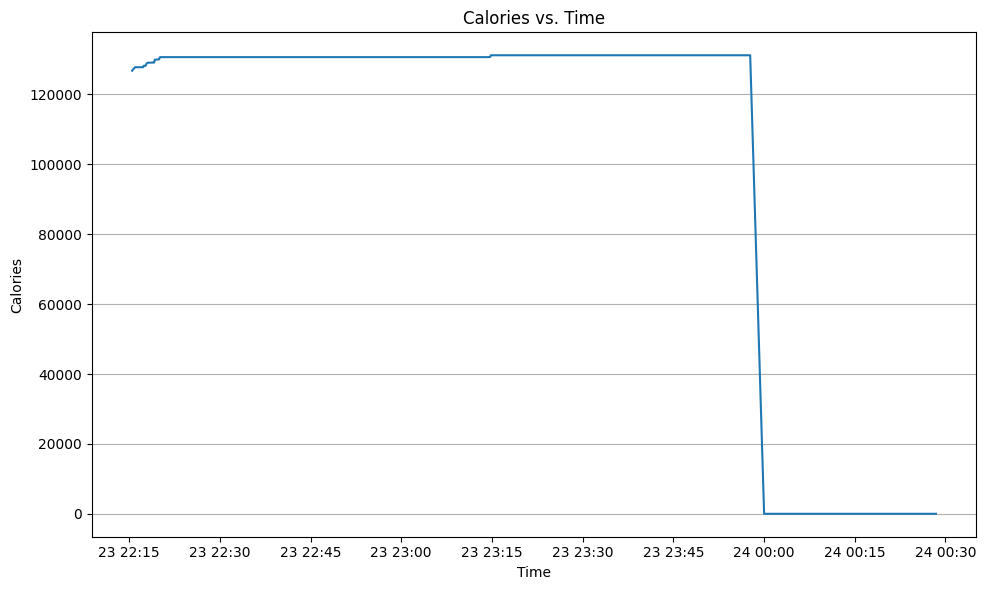

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(calorie['Time'], calorie['TotalCalories'])
plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Calories vs. Time')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [115]:
126775/1800


70.43055555555556

Total calories = 126775. A person on average consumes 1800 calories per day. From this analysis, we find that this data is being stored from more than 70 days. Because the data we have is of 2 hours and 47 minutes during midnight, there is **no change in calories**. But after 12 PM, the data resets as we can see in the plot.